In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


# train test split

In [4]:
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]

# fittingthe model

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul',seasonal='mul',seasonal_periods=12).fit()

# Evaluating Model against Test Set

In [12]:
test_pred = fitted_model.forecast(48).rename('Forecast')

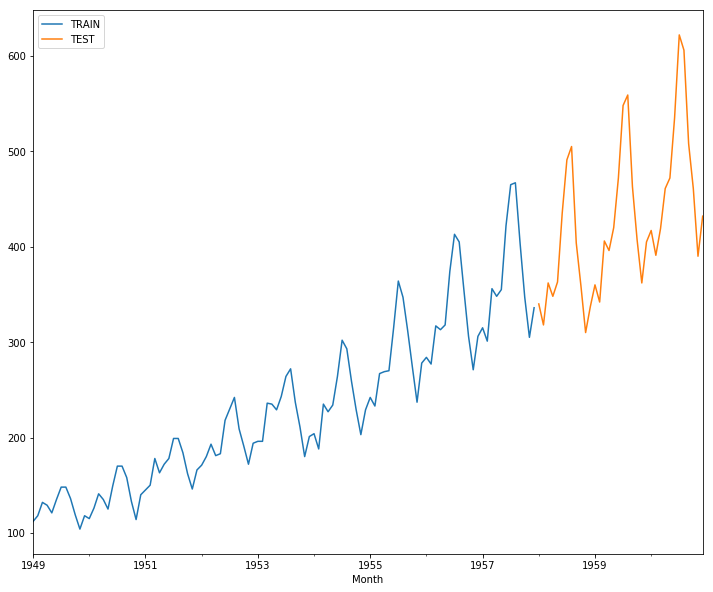

In [20]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,10));

In [21]:
#plot the forecast

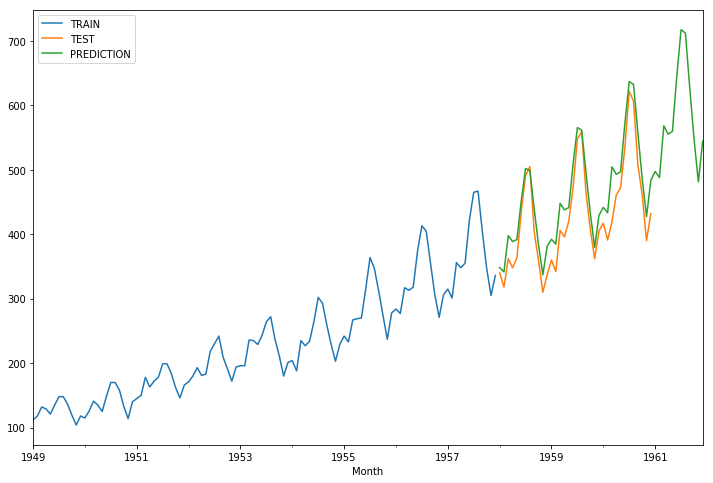

In [23]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_pred.plot(legend=True,label='PREDICTION');

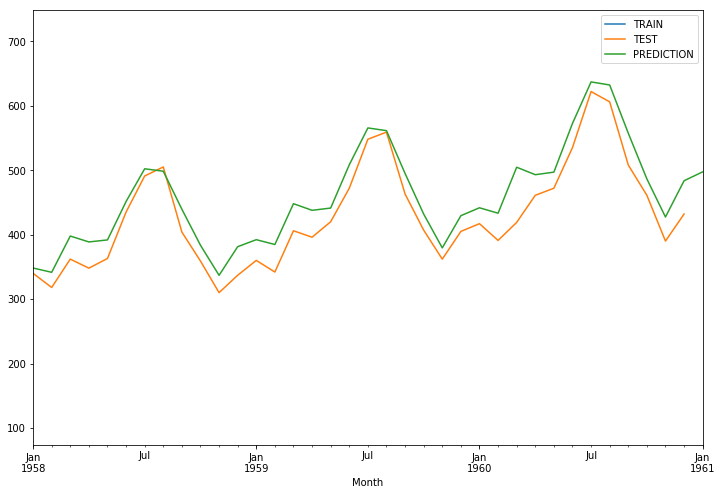

In [24]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_pred.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

# Forecasting into Future


In [25]:
#fitting entire data

In [26]:
model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [27]:
forecast =model.forecast(36)

C:\Users\arjun\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\arjun\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\Users\arjun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


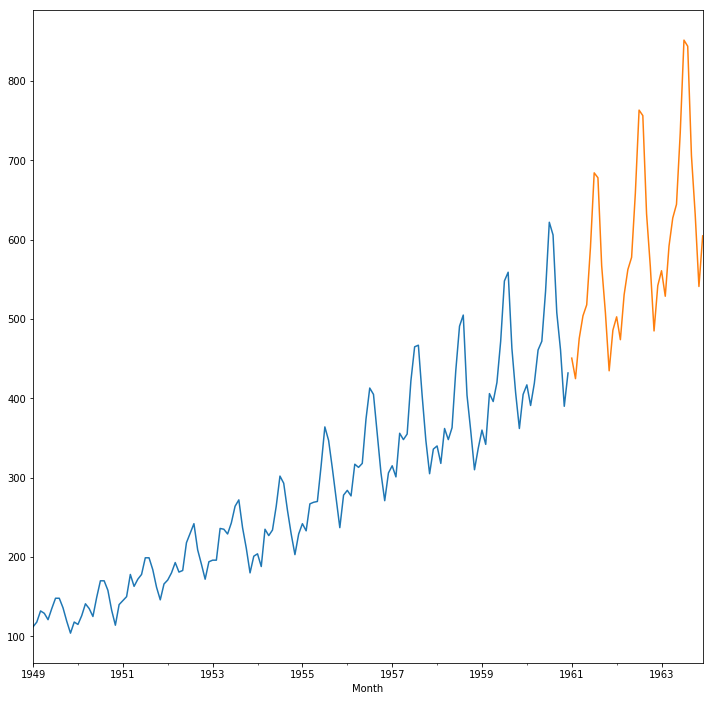

In [30]:
df['Thousands of Passengers'].plot(figsize=(12,12))
forecast.plot()